['DATE', 'TIME', 'YEAR', 'MONTH', 'DAY', 'WEEKDAY', 'HOUR', 'ACCLOC', 'IMPACTYPE']
Dataset Shape: (18957, 9)


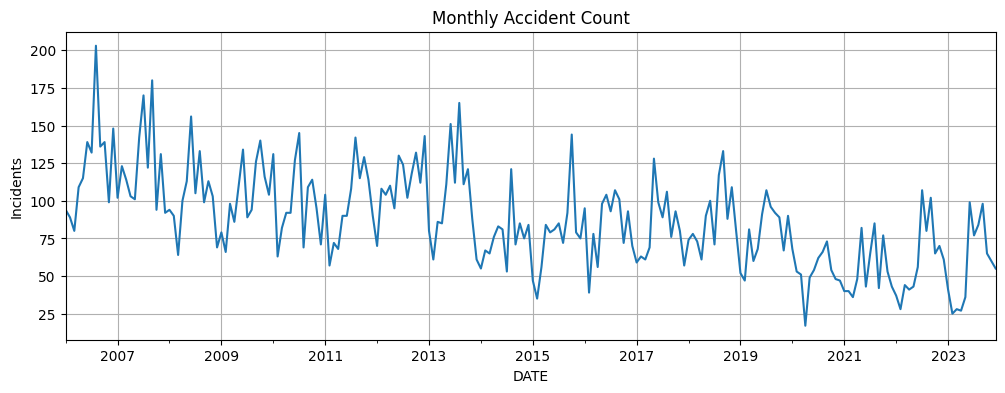

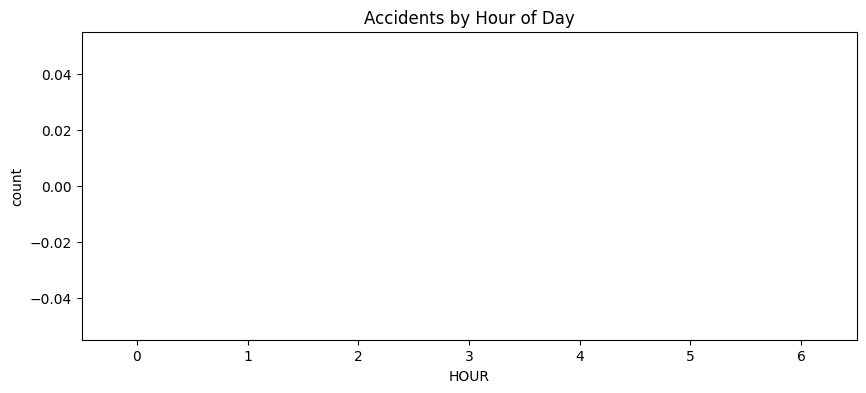

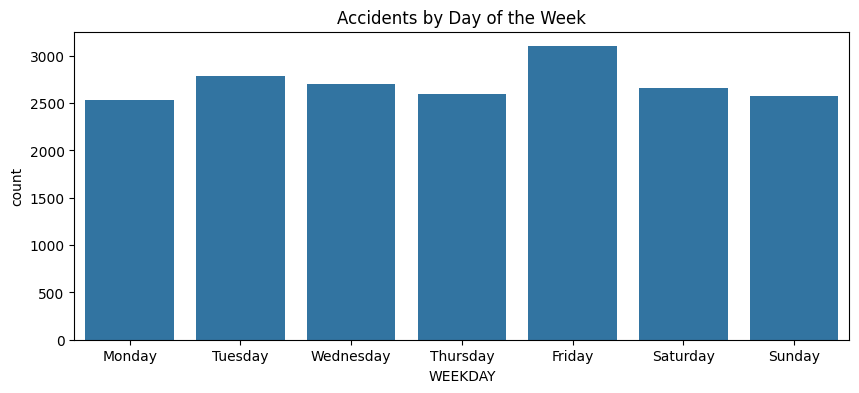

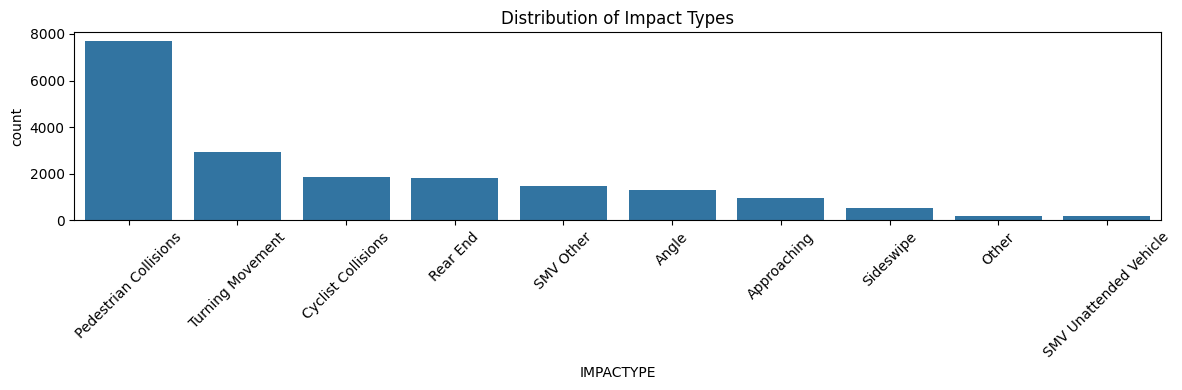

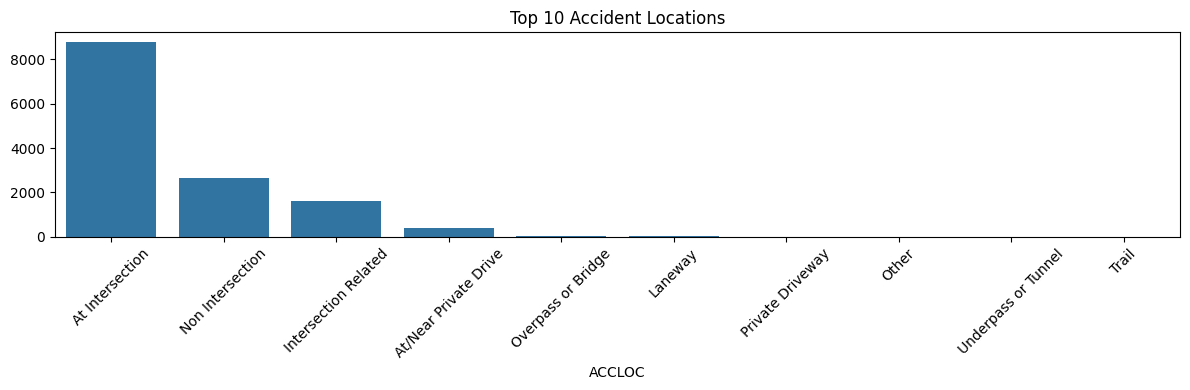

KeyError: 'LATITUDE'

In [ ]:
# 🚦 Traffic Accident EDA Notebook
!pip install seaborn folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the cleaned data
df = pd.read_csv("../data/processed/processed_data.csv")
print(df.columns.tolist())

# Preview
print("Dataset Shape:", df.shape)
df.head()

# -- Trend Over Time --
df['DATE'] = pd.to_datetime(df['DATE'])
accidents_per_month = df.groupby(df['DATE'].dt.to_period('M')).size()

accidents_per_month.plot(figsize=(12, 4), title="Monthly Accident Count", ylabel="Incidents", grid=True)

# -- Accidents by Hour --
plt.figure(figsize=(10, 4))
sns.countplot(x='HOUR', data=df)
plt.title("Accidents by Hour of Day")
plt.xticks(rotation=0)
plt.show()

# -- Accidents by Day of Week --
plt.figure(figsize=(10, 4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='WEEKDAY', data=df, order=order)
plt.title("Accidents by Day of the Week")
plt.show()

# -- Distribution of Impact Types --
plt.figure(figsize=(12, 4))
sns.countplot(x='IMPACTYPE', data=df, order=df['IMPACTYPE'].value_counts().index)
plt.title("Distribution of Impact Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -- Top 10 Accident Locations --
plt.figure(figsize=(12, 4))
top_locs = df['ACCLOC'].value_counts().nlargest(10)
sns.barplot(x=top_locs.index, y=top_locs.values)
plt.title("Top 10 Accident Locations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
